# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [47, 125, 333]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,76237,3473,7102,16538,778,918
2,8565,4980,67298,131,38102,1215


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.277
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

The samples chosen were selected based on their differences amongst each other in terms of the distribution of purchases within the various categories. The different categories are interpreted as being the following:

* Fresh: Fresh fruits, vegetables and other perishable produce
* Milk: Cheese, yoghurt, butter, milk, and other dairy products
* Grocery: Non-perishable food products such as dried, canned, processed or preserved foods, sauces, spices and condiments and beverages
* Frozen: All frozen goods
* Detergents_paper: Household items such as cleaning products, toilet and hygiene products and perhaps pet products
* Delicatessen: Bakery and deli items such as breads, cured meats, pickled items and possibly including alcholic beverages

The median values for the customer data are shown below:

|       | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|-------|-------|------|---------|--------|------------------|--------------|
|       | 8504  | 3627 | 4755.5  | 1526   | 816.5            | 965.5        |


Here is the same samples, but the purchases are now displayed in terms of how many standard deviations they are from the mean:

|       | Fresh   | Milk    | Grocery | Frozen           | Detergents_Paper | Delicatessen |
|-------|---------|---------|---------|------------------|--------------|---------|
| 0     | 2.5670  | 6.5664  | 5.0109  | 0.9702           | 4.4652       | 1.7518  |
| 1     | 5.0791  | -0.3148 | -0.0894 | 2.7738           | -0.4412      | -0.2152 |
| 2     | -0.2716 | -0.1106 | 6.2449  | -0.6058          | 7.3871       | -0.1099 |

Percentiles of the samples:

|       | Fresh   | Milk    | Grocery | Frozen           | Detergents_Paper | Delicatessen |
|-------|---------|---------|---------|------------------|--------------|---------|
| 0     | 97.7273 | 99.7727 | 99.3182 | 90.4545          | 99.0909      | 98.4091 |
| 1     | 99.7727 | 47.7273 | 63.4091 | 98.1818          | 48.6364      | 48.6364 |
| 2     | 50.4545 | 61.1364 | 99.7727 | 4.3182           | 99.7727      | 59.7727 |

It can be seen that the selected samples all vary significantly from one another, as well as possessing one or more features that deviate significantly from the mean and median values for the data set as a whole. A boxplot of the sample's features mapped in feature space is shown below, where the purchasing behaviour described in the next section is shown visually.

 1. The first customer purchases relatively large quantities of goods across all categories. In particular, the purchases of 'Fresh', 'Milk', 'Grocery' and 'Detergents_Paper' and 'Delicatessen' are all greater than the 95th percentile for the respective categories. With the exception of 'Frozen', this customer's z-scores are many standard deviations from the mean, and one of the larger purchasers of goods in the dataset judging by the size of the purchases compared to the mean and median across categories. Based on this analysis, this purchasing pattern suggests the customer is either another wholesaler or perhaps a supermarket.
 1. The second customer purchases a large quantity of fresh and frozen foods, but doesn't spend much on the other categories. The purchases for 'Milk', 'Grocery', 'Detergents_Paper' and 'Delicatessen' are all below the mean for their respective categories (and the median values, with the exception of 'Grocery') while the expenditures for 'Fresh' and 'Frozen' are both in the high 90 percentiles at approximately 5 and 2.7 standard deviations higher than the mean respectively. The purchases for 'Milk', 'Detergents_Paper' and 'Delicatessen' are firmly around the 50th percentiles with z-scores indicating small deviations from the mean.  Based on this behaviour, this customer could be a large restaraunt or hotel chain that cooks or prepares a large quantity of fresh and frozen foods, while purchasing smaller amounts of other goods such as cleaning supplies.
 1. The third customer spends a great deal on grocery items and detergents and paper products, but not much else on the other categories. Purchases for the 'Fresh', 'Milk', 'Frozen', and 'Delicatessen' categories are all near or below the mean or median values. Additionally, the same categories are within the 50th-60th percentiles, whereas the 'Grocery' and 'Detergents_Paper' purchases are in the upper 90 percentiles being many standard deviations higher than the mean. Again, this customer tends to focus their business non-perishable goods, and due to the sheer size of purchases may be a bulk goods retailer or perhaps a convenience store/petrol station chain.

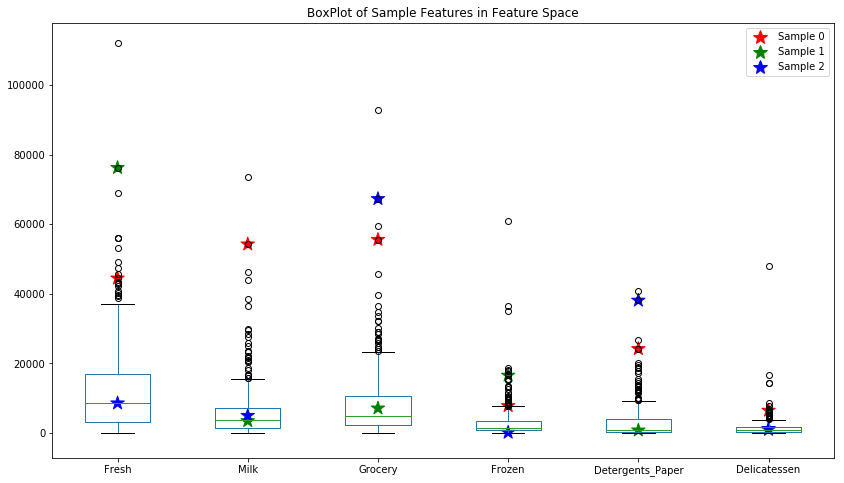

In [4]:
import matplotlib.pyplot as plt

ax = data.plot(kind='box', subplots=False, figsize=(14,8), layout=(3,3))
index = 0
for c in samples.columns:
    plt.scatter(y=samples[c], x=np.repeat(index+1, 3), marker='*', color=['r','g','b'], s=200)
    index = index+1

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='r', marker='*', markersize=15, label='Sample 0', linestyle='None')
blue_line = mlines.Line2D([], [], color='g', marker='*', markersize=15, label='Sample 1', linestyle='None')
green_line = mlines.Line2D([], [], color='b', marker='*', markersize=15, label='Sample 2', linestyle='None')
plt.legend(handles=[red_line, blue_line, green_line])
_ = ax.set_title('BoxPlot of Sample Features in Feature Space')

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data.Grocery, test_size=0.25, random_state=37)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=37)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.507889883437


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

After trying out all of the features, 'Grocery' yielded the highest R<sup>2</sup> score of ~0.508, whereas all other features yielded either negative R<sup>2</sup> scores or lower scores than the 'Grocery' feature. Plotting the residuals shows that there is some distribution about the residual line, but there is still a concentration of data points on the left. Ideally, the distribution would be more randomised. However, the residuals plot shown below confirms somewhat the appropriateness of selecting the 'Grocery' feature.

This demonstrates that to some extent, the 'Grocery' feature can be predicted by other features in the data, making 'Grocery' potentially redundant. This feature could be considered for removal in order to simplify the data for the purpose of visualisation, statistical analysis and other computations such as clustering.

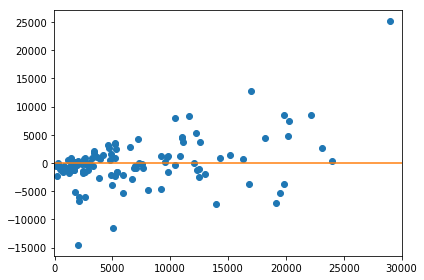

In [6]:
## Plot residuals
residuals = [i -j for i, j in zip(y_test, predictions)]
plt.figure()
plt.plot(y_test, residuals, 'o', [-10, 30000], [0,0], '-')
plt.xlim([-10, 30000])
plt.tight_layout()
##

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

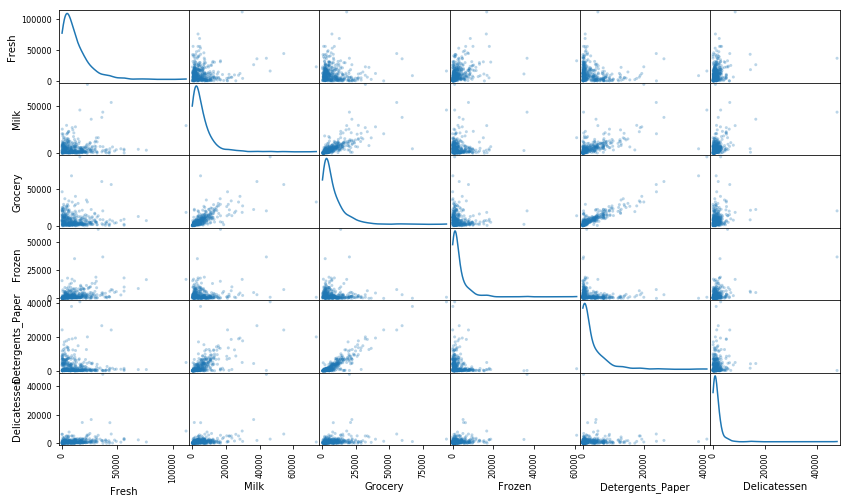

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

A histogram plot of the features for the data set appears below. It is apparent that all of the features are highly skewed, exhibiting extremely positive skew. The density plots in the scatter matrix also demonstrate this aspect of the feature's distribution. In order to make this data more suitable for processing by a clustering algorithm, the data will need to be normalised in some way to address this imbalance in the distribution. Normalising data by taking the log is a typical data pre-processing strategy for correcting highly skewed data as many machine learning algorithms will perform poorly on data that is skewed.

The scatter plots also provides evidence of a large number of outliers in the data. In addition to being highly positvely skewed, many of the scatter points are centered around zero while also having many outliers. This is also apparant from the histogram where a number of low-frequency bins are visible in the long tails to the right. As with normalising the data to correct for skew, the presence of such outliers will need to be addressed before applying clustering to the dataset, otherwise they may distort the results depending on the algorithm selected and the distance metric chosen.

The scatter matrix shows what appears to be a correlation between 'Grocery' and 'Detergents_Paper'. Interestingly, 'Detergents_Paper' had the second best R<sup>2</sup> score in the previous question, with a value ~0.42. The correlation between the two features is evidenced in the scatter matrix by their somewhat linear relationship. Despite the majority of features having values clustering or centering around 0, 'Grocery' and 'Detergents_Paper' show a small tendency to form a linearly distributed pattern extending diagonally from lower left to upper right. Admittedly, many of the values are still centered around 0. However, the other features' scatter plots show values distributed along the minima of the x and y axes in a somewhat random fashion indicating no discernible relation amongst those pairs.

In the scatter plot below, it can be seen more closely that the data points for 'Grocery' and 'Detergents_Paper' appear to distribute themselves about a line, unlike the plots that display no pattern. This correlation between the two features supports the previous observation that 'Grocery' may make a good candidate for feature removal because another feature ('Detergents_Paper') has relevance in predicting 'Grocery'.

Furthermore, the heatmap below clearly shows that these two features exhibit strong correlation because their pairwise colour is the next strongest (darkest) value after any 'identity' colour indicated for self-correlated pairs. This is further evidence that one of the two features (likely 'Grocery') is redundant and could be removed to reduce the feature set without serious loss of information.

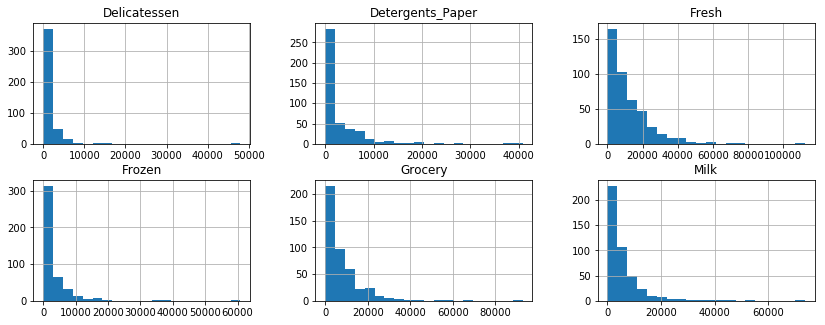

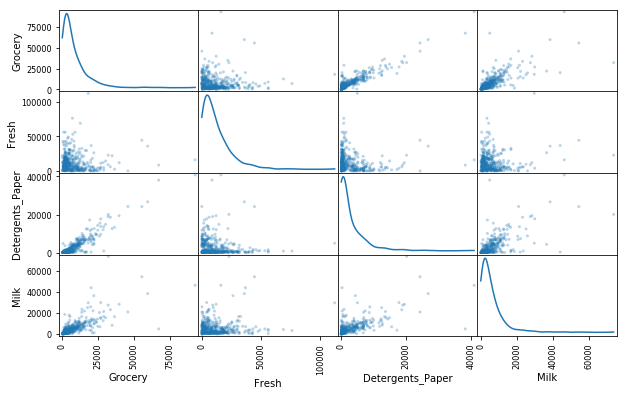

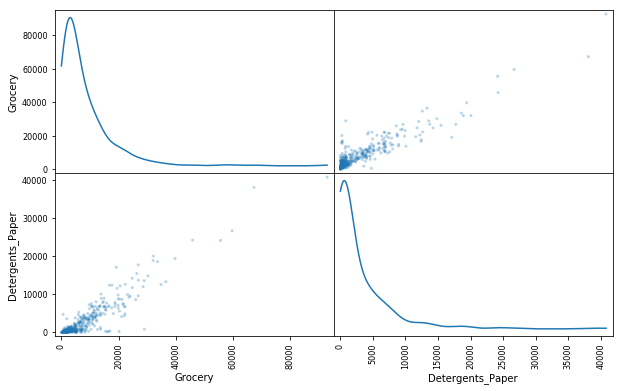

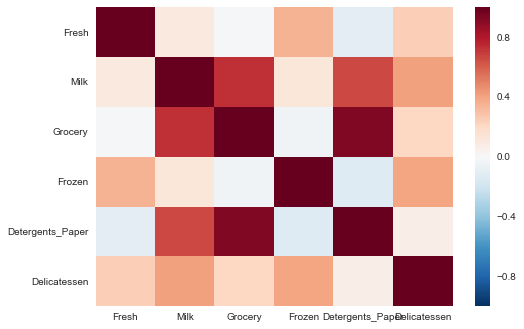

In [8]:
_ = data.hist(figsize=(14,8), bins=20, layout=(3,3))

plt.figure()
_ = pd.plotting.scatter_matrix(data[['Grocery', 'Fresh', 'Detergents_Paper', 'Milk']], alpha = 0.3, figsize = (10,6), diagonal = 'kde');
_ = pd.plotting.scatter_matrix(data[['Grocery', 'Detergents_Paper']], alpha = 0.3, figsize = (10,6), diagonal = 'kde');
plt.show()

import seaborn as sb
plt.figure()
_ = sb.heatmap(data.corr())
plt.show()


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

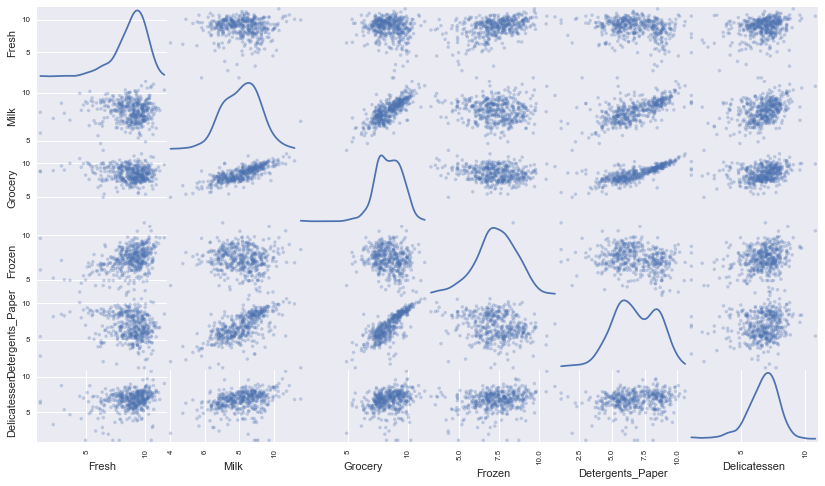

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,11.241602,8.152774,8.868132,9.713416,6.656727,6.822197
2,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# For each feature find the data points with extreme high or low values
candidate_outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
#     print(data[feature])
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    iqr = Q3 - Q1
    step = iqr * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    candidate_outliers.append(list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index))

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

The following indexes have been identified as multi-category outliers. These customers have at least two features that lie outside the IQR threshold (using Tukey's method). I would argue that these should be removed from the dataset because they represent customers whose purchasing habits are outliers for multiple categories and don't represent the majority of the customers we wish to identify. Furthermore, as can be seen by comparing the density and bar plots below, the identified outliers have been selected because the purchases for the relevant category fall well below the 25th percentile, often falling in the low range of the distribution tails, being many standard deviations from the norm.

* 65: Fresh, Frozen
* 66: Fresh, Delicatessen
* 75: Grocery, Detergents_Paper
* 128: Fresh, Delicatessen
* 154: Milk, Delicatessen

For the reasons stated above, and as a result of evaluating these data points against the density and bar charts below, these customers have been removed from the dataset. Outliers such as these can have a negative or unexpected impact on clustering algorithms if the distance metric used to center the clusters is affected by such outliers. In some cases such points may affect the calculation of cluster centers, or even wind up being selected as centers themselves during intialisation.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


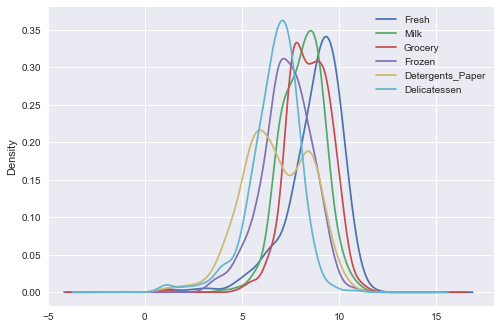

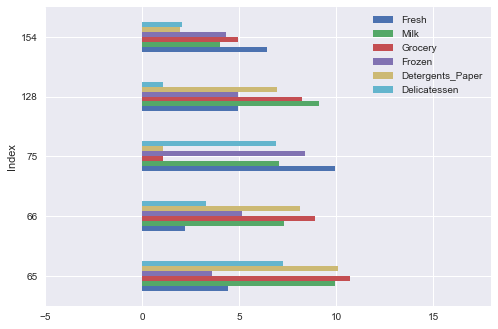

In [12]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Find the intersection of each set of outliers for each category
# intersected with all other categories
for idx,i in enumerate(candidate_outliers):
    for j in candidate_outliers[idx+1:]:
        outliers.extend(np.intersect1d(candidate_outliers[idx], j))

outliers = np.unique(outliers)

display(log_data.describe())
display(log_data.iloc[outliers])

plt.figure()
ax = log_data.plot(kind='density', xlim=(-5,18))
ax2 = log_data.loc[outliers].plot(kind='barh', xlim=(-5,18))
ax2.set_ylabel('Index')
plt.show()

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

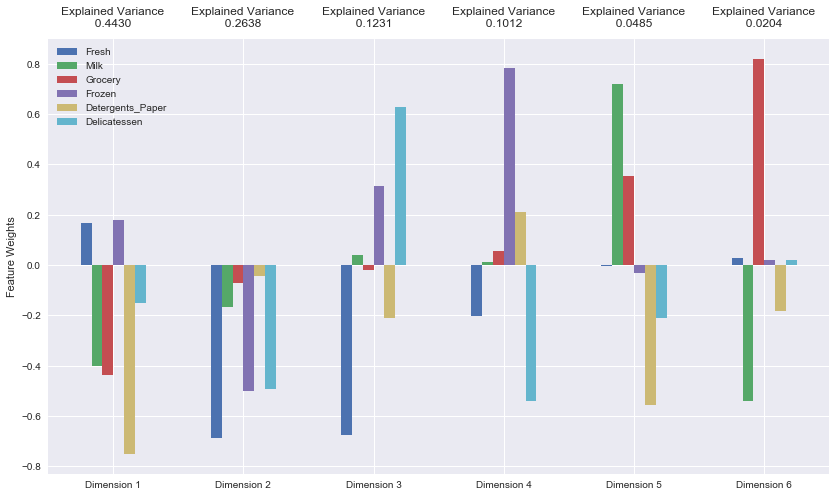

In [13]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca = pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first and second principal components explain a total of 0.7068 variance in the data observed.
The first four principal components explan a total of 0.9311 variance in the data.

The first Principal Component (PC) indicates a weakly positive correlation with 'Fresh' and 'Frozen', and a strong correlation (negatively weighted) with 'Milk' and 'Grocery', as well as 'Detergents_Paper'. The correlation between 'Milk' and 'Grocery' isn't surprising because the scatter plot of the the log transformed data shows a linear relation between the two which is arguably more pronounced than the original linear relation observed between Grocery and Detergents_Paper in the raw data. However, 'Detergents_Paper' has the largest magnitude of any variable in this dimension, followed by 'Grocery' and 'Milk'. This indicates that these 3 features vary together; as one increases so do the others, with Grocery and Milk moving nearly in lockstep. Likewise, as Fresh and Frozen are correlated and as one increases so does the other. Therefore, the first PC is primarily a measure of the purchases of 'Detergents_Paper'. Samples having negative scores for this PC will tend to have larger values for 'Detergents_Paper', 'Grocery' and 'Milk'. Wherease samples having positive scores for this PC will tend to have large values for the 'Fresh' and 'Frozen' features and smaller values for the negatively-weighted features.

In the case of the second PC, all of the variables for this dimension are negatively-weighted, indicating that samples having negative scores for this component will likely have large values for this PC's most significant variables. In this case, the most significant variables (having the largest values) are 'Fresh', followed by 'Frozen' and 'Delicatessen'. Again, samples having negative scores for PC 2 will tend to have larger 'Fresh' purchases, with 'Frozen' and 'Delicatessen' having nearly equal impact on each other.

Principal Component 3 displays strong correlation (negatively-weighted) with 'Fresh', and strong positive correlation with 'Delicatessen' and to a lesser degree 'Frozen'. This component will score positively with samples having large 'Delicatessen' and 'Frozen' purchases, and conversely score negatively with customers having large 'Fresh' purchases. Whereas a positive score will indicate low 'Fresh' purchases but a larger value for 'Delicatessen' and 'Frozen' respectively. However, this is the 3rd PC so this conflict between 'Fresh' and 'Delicatessen' is not as strong as the effect of PCs 1 and 2.

Finally, PC 4 exhibits strongly positive correlation for 'Frozen', explaining larger variance for this feature than the negatively weighted feature 'Delicatessen'. Customer samples having positive scores for this PC will likely represent significant purchases for the 'Frozen' category and smaller purchases for 'Delicatessen'. Conversely, a negative score will correlate with larger purchases for 'Delicatessen' and reduced purchases of 'Frozen' goods.

To summarise, PC 1 explains slightly less than half of all variance in the data, with 3 of the 6 features showing a tendency to vary together (negatively weighted) and a further 2 features varying together (positively weighted). PC 2 further explains an additional ~26% of variance for 3 negatively weighted features. Together these two components explain ~70% of variance and cover the correlation of 5 out of 6 features in the data.

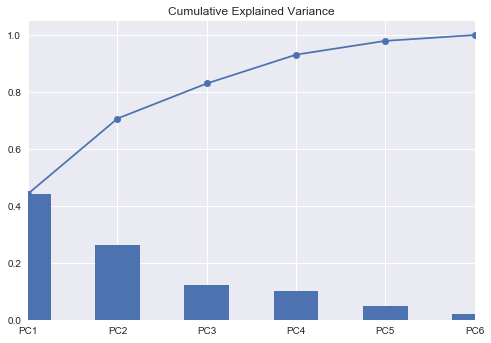

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
PC1,0.167464,-0.401439,-0.438111,0.178210,-0.751426,-0.149871
PC2,-0.685935,-0.167228,-0.070729,-0.500542,-0.042444,-0.494147
PC3,-0.677389,0.040205,-0.019533,0.315043,-0.211702,0.628551
PC4,-0.204293,0.012811,0.055676,0.785449,0.209614,-0.542340
PC5,-0.002614,0.719238,0.355386,-0.033086,-0.558154,-0.209186
PC6,0.029156,-0.540183,0.820533,0.020541,-0.182388,0.019748


In [14]:
plt.figure()
ax = pd.Series(data=pca.explained_variance_ratio_, index=['PC{}'.format(x) for x in np.arange(1,7)]).plot(kind='bar')
_ = pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot(ax=ax, kind='line', style='.-', marker='o')
ax.set_title(label='Cumulative Explained Variance')
plt.show()

display(pd.DataFrame(data=pca.components_, index=['PC{}'.format(x) for x in np.arange(1,7)], columns=good_data.keys()))


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-4.3646,-3.9519,-0.1229,0.6240,0.5379,0.0551
1,0.7394,-2.9834,-0.8204,1.2945,0.1297,0.4712
2,-4.5848,0.4149,-1.5408,-1.2655,-0.8767,1.2544


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-4.3646,-3.9519
1,0.7394,-2.9834
2,-4.5848,0.4149


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

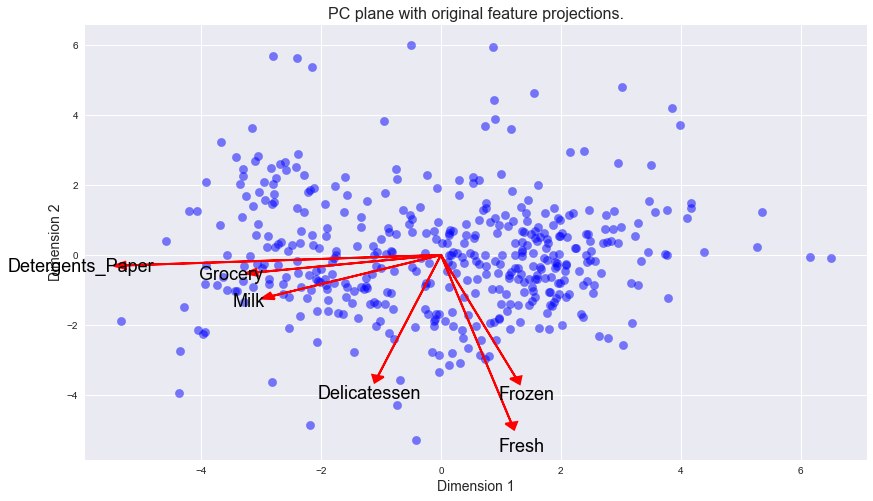

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

**Advantages of K-Means**<br/>
K-Means results in hard clusters, and performs well on large data sets with small-medium numbers of clusters. K-Means produces mainly spherical clusters, treating all dimensions equally in computing the distance metric to determine cluster membership. This algorithm is useful if the data presents a natural cluster structure in visualisations, and/or you know precisely how many clusters you intend to find.

**Advantages of Gaussian Mixture Models (GMMs)**<br/>
GMMs use soft clustering, modelling data points as though they were all drawn from a mixture of Gaussian distributions. GMMs  can utilise the covariance information in the data to produce non-spherical clusters, unlike K-Means which is constrained to spherical clusters. GMMs are useful when the distribution of data points is such that K-Means would fail to find a reasonable cluster structure, or where K-Means has produced clusters that don't make sense (e.g. as a result of fulfilling the requirement to find 'n' clusters; [K-Means can find 'clusters' even among uniform data](https://stats.stackexchange.com/a/133841))

**Observations of the data**<br/>
In observing the Biplot of the dimensionally reduced data, there isn't any visually apparent or naturally discernible grouping of the data. It isn't easy to see a simple clustering of the data into 2 or more clusters. The cluster boundaries may not be strictly circular or have hard edges. It is also conceivable that the data points may best be represented by probabalistic membership in a cluster due to the density of the data point 'cloud'. This suggests that a GMM may be a suitable choice of clustering algorithm on this problem because the dataset isn't particularly large (therefore the GMM computation won't be a hindrance), and a GMM can provide probability measures on cluster membership for those data points that are close to the edges shared by the cluster where membership isn't clear-cut.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2, random_state=37)
#clusterer = KMeans(n_clusters=2, random_state=37)
clusterer = clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
#centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=37)
print(score)

0.422324682646


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

K-Means silhouette scores, with outliers, for n_clusters from 2-10:<br/>
[0.4192, 0.3924, 0.3302, 0.3522, 0.3601, 0.3640, 0.3538, 0.3590, 0.3497]

GMM silhouette scores, with outliers, for n_clusters from 2-10:<br/>
[0.4104, 0.4241, 0.3078, 0.2851, 0.3062, 0.3426, 0.3248, 0.2820]

K-Means silhouette scores, with outliers *removed*, for n_clusters from 2-10:<br/>
[0.4263, 0.3933, 0.3317, 0.3500, 0.3635, 0.3635, 0.3538, 0.3434, 0.3478]

GMM silhouette scores, with outliers *removed*, for n_clusters from 2-10:<br/>
[0.4223, 0.3661, 0.2871, 0.3302, 0.333, 0.2965, 0.319, 0.3116, 0.2777]

Based on the silhouette score, K-Means using 2 clusters with outliers removed yields the highest score. However, due to the advantages of the Gaussian with respect to the soft clustering, GMM will be selected.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

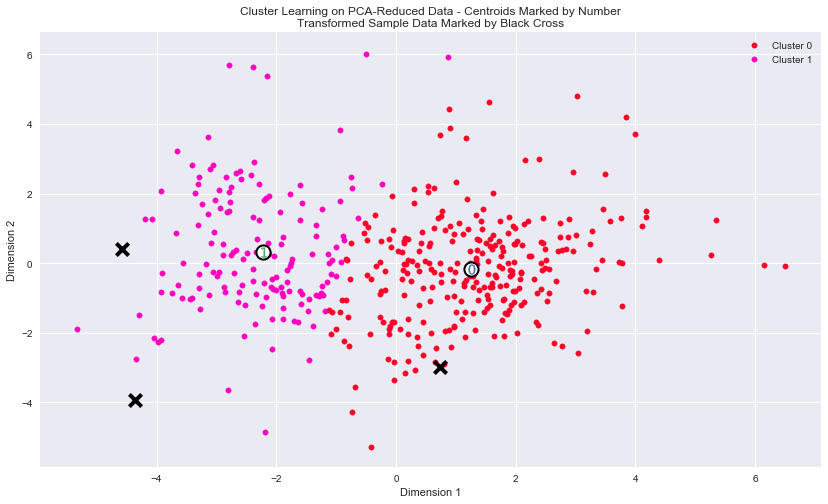

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Comparing the average feature values for cluster 1 to those of the mean and median in the raw data, the data points assigned to segment 1 correspond to customers with comparatively high levels of purchases in the 'Milk', 'Grocery', 'Detergents_Paper' and to some extent 'Delicatessen'. In contrast, customers in segment 0 exhibit relatively high purchase activity in 'Fresh' and 'Frozen' and lower levels of purchases in the remaining categories.

Segment 1 could best be described as representing customers in the retail sector, including bulk retailers, supermarkets, grocers, convenience stores and petrol stations that tend to sell non-perishable and/or pre-packaged food stuffs.

Segment 0 has relatively high levels of fresh and frozen goods being purchased, which would likely include customers such as restaurants, cafes, hotels and fast-food chains that cook or prepare a variety of fresh and/or frozen foods.

Referring to the mean and median values for the original data below, it can be seen from the above segment descriptions that for segment 1, the 'Milk', 'Grocery', 'Detergents_Paper' (and again to some extent 'Delicatessen') values are higher than their respective mean and median values.

Curiously, for segment 0 the 'Fresh' and 'Frozen' values are below the mean and not far above the 50th percentile, however the relative values of the other categories are well below their respective means (in the low 30th percentiles) and it could be argued that overall the correlations among the features is still preserved in the data and therefore well represented in segment 0.

Overall, in observing the statistics for the true_centers, it is evident that cluster 1 customers spend less on 'Fresh' and 'Frozen' goods, whereas cluster 0 customers are predominantly the opposite, lending further support to the 2-cluster arrangement, and the 2-dimensional PCA transformation (where the first 2 PCA dimensions are differentiated primarily along the same features as the clusters).

|       | Fresh        | Milk        | Grocery     | Frozen           | Detergents_Paper | Delicatessen |
|-------|--------------|-------------|-------------|------------------|--------------|-------------|
| mean  | 12000.2977   | 5796.2659   | 7951.2773   | 3071.9318        | 2881.4932    | 1524.8705   |
| median| 8504         | 3627        | 4755.5      | 1526             | 816.5        | 965.5       |


In [22]:
from scipy.stats import percentileofscore
percentile_scores = []
for index, row in true_centers.iterrows():
    percentile_scores.append([percentileofscore(data[x], row[x]) for x in row.index])

print("Percentiles for the True Centers:")
display(pd.DataFrame(np.round(percentile_scores, decimals=4), columns=data.columns))

Percentiles for the True Centers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,52.2727,34.3182,34.3182,58.1818,32.0455,41.1364
1,27.9545,78.8636,80.4545,30.9091,80.2273,50.0000


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

Originally, I had identified the 3 sample customers as belonging to:
* Sample 0: Wholesalers/Supermarkets
* Sample 1: Restaurants
* Sample 2: Bulk Retailer/Convenience store chain

**Selected samples:**

|       | Fresh | Milk  | Grocery | Frozen | Detergents_Paper | Delicatessen |
|-------|-------|---------|--------|------------------|--------------|------|
| 0     | 44466 | 54259   | 55571  | 7782             | 24171        | 6465 |
| 1     | 76237 | 3473    | 7102   | 16538            | 778          | 918  |
| 2     | 8565  | 4980    | 67298  | 131              | 38102        | 1215 |

Taking into consideration the cluster assignments, Sample 0 and 2 belong to the same cluster which to some extent makes sense because both customers exhibit high levels of purchases in 'Grocery' and 'Detergents_Paper' categories both of which ranked highly in magnitude for the first principal component. Similarly, the purchases exhibited by sample 1 are consistent with the purchasing behaviour of the 'average' customer identified by segment 1, at least in terms of relative expenditures on categories within the sample itself.

Despite the amount spent in each category being larger or smaller than the segment mean (or the raw data mean) for the samples in comparison to the segment mean, I would argue that the segment predictions for the samples are consistent with the clustering descriptions I provided in Question 8. I would admit that perhaps I chose data points that are verging on being considered as outliers or having extreme values, so perhaps they aren't 'representative' of the average customer for the cluster.

Based on the above analysis, it is reasonable to group sample 0 and 2 together in cluster 1, as their are strong similarities between the two, particularly considering the overlap in purchasing behaviour for Wholesalers/Supermarkets vs Bulk Retailer/Convenience store chain. Likewise, sample 1 belongs in cluster 0 as it was predicted to be a restaurant and I have already identified cluster 0 as likely representing restaurants, cafes, hotels, etc.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

My first impression is that the (presumably) retail segment represented by cluster 1 would be more tolerant to a 3 days/week delivery schedule, mostly due to the fact that their purchases of fresh and frozen foods is lower than that of cluster 0. As a result, the profile of customers in cluster 1 suggest they don't require the same frequency of deliveries that a cluster 0 customer may require (due to the perishable nature of fresh foods). In contrast, cluster 0 customers are probably quite sensitive to a change in schedule. For example, restaurants, hotels and cafes are sensitive to inventory levels and typically don't have space to store excess goods. In addition, the nature of such businesses require frequent, small orders to be fulfilled, as well as replenishment orders for regular items. They also tend to take advantage of special orders that can be time-sensitive due to the perishability of the item (oysters, seafood, etc).

However, supermarkets typically have near-daily deliveries of their high-turnover fresh produce (and frequently compete with competitors on the basis of the freshness and quality of their produce), so in that respect I'm not confident that supermarkets would accept a 3 days/week schedule. However, for the purposes of this assignment I will accept that customers in cluster 1 may respond favourably (or perhaps "not negatively") to the change in schedule.

Most of the above observations are conjecture, so in order to determine if the different clusters are in actuality different customer segments we can conduct A/B testing on the clusters and measure if one cluster is more or less favourable to the change in delivery schedule.

The objective of the A/B test would be to determine if a 3 days/week evening delivery schedule is positively received by the customers. In order to minimise loss of sales, rather than actually changing the schedule the distributor could have their sales and orders teams ask for feedback from customers if they would favour the proposed changes. Depending on the outcome of this first A/B test, a second A/B test that enacts a change in delivery service would be tested. In the case of the second test round, complaints, cancelled orders and drop-outs would be deemed as negative responses to the change.

The entire data set consists of only 440 customers, and the clustering is not evenly split (155 data points in cluster 1; 280 in cluster 0). Taking a small sample (say 10%) of each cluster and then splitting that sample in half for the A/B test wouldn't be sufficiently representative and the margin of error too large. For this reason, I would propose that the entire cluster is selected to participate in the A/B testing.

One round of A/B testing for each cluster should be sufficient for determining the receptivity of the change, and the test length should be for 4 weeks to allow enough feedback samples to be collected. If the results warrant further testing, the second round of A/B tests involving an actual delivery service change can be enacted, using the same methodology as in the first A/B test.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

To label the new customers, the wholesaler could make predictions on the new (estimated) customer data using the existing clustering algorithm. In order to do this the wholesaler would need to go through the same steps as executed here in order to make such a prediction on the data. They would have to normalise, scale, apply PCA to the data and then fit the clustering algorithm to the data, and only then could they make a prediction. Alternatively, the trained PCA and clusterer could be saved for later reuse, saving the problem of refitting those components to the data.

Alternatively, a supervised learner could be trained on the original dataset, with the addition of the cluster ID used as the target variable. Once trained, the supervised model could be used to make predictions on the new customer data in order to determine what cluster they belong to. This would require processing the data using PCA and modelling using train/validation/test splits, as well as iteratively training and tuning the model until it reaches an acceptable level of performance. The steps and time needed to produce a trained supervised classifier may not be worthwhile to the wholesaler. In addition, the model may need to be retrained with new data from time-to-time.

In either case, once the cluster ID is determined the wholesaler would be equipped with the neccessary information to determine the delivery service level for the new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

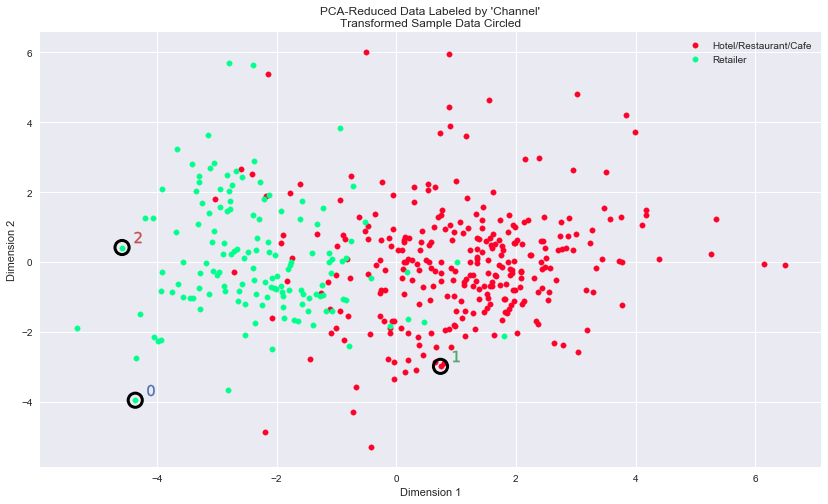

In [24]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

It appears that the clustering algorithm and cluster count selected earlier compare favourably with the distribution showing the hidden feature 'Channel'. First, the number of clusters (2) is in agreement with the number of categories based on Channel. Second, the conceptual labels applied to the clusters are similar, as are the labels assigned to the clusters themselves (i.e. the cluster labels aren't reversed in the other distribution). Furthermore, the distribution of customers within the clusters is largely in agreement with the distribution of customers by Channel.

The second cluster distribution utilising the 'Channel' feature tends to have quite a few customers on either side of the cluster 'boundary' that exists in the K-Means clustering result produced in this assignment. This may be a good thing though because unlike the K-Means cluster which imposed a hard cluster, the 'Channel'-based 'clusters' are more forgiving, allowing for some variation and flexibility in dealing with for instance, the delivery options applied to a customer.

It appears that in the Channel-based distribution, a large number of 'HoReCa' customers exist in the area dominated by 'Retail'. The reverse cannot be said however as there are fewer 'Retail' data points in the 'HoReCa' cluster. Therefore I would say that the points to the right of 0 on the x-axis could *possibly* be classified as purely 'HoReCa', but I'm not sure what this means other than perhaps pointing to the need for a third cluster to capture the customers that appear to be a little bit 'HoReCa' and a little bit 'Retail'. On that basis, I will say that neither Channel permits us to say cleanly segment the customers into one cluster or another with this distribution, unlike the K-Means cluster applied earlier.

I would argue that these Channel classifications are consistent with the previous customer segments because in both data distributions, cluster 1 corresponds to the retail-oriented business sector, and cluster 0 corresponds to the service-oriented business sector. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.